In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_excel("iris.xls")
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## Exploratory Data Analysis

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


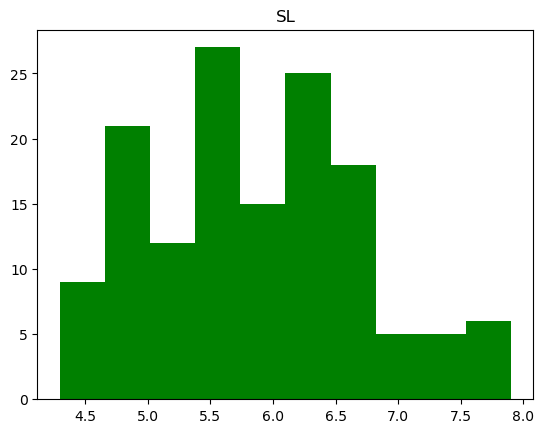

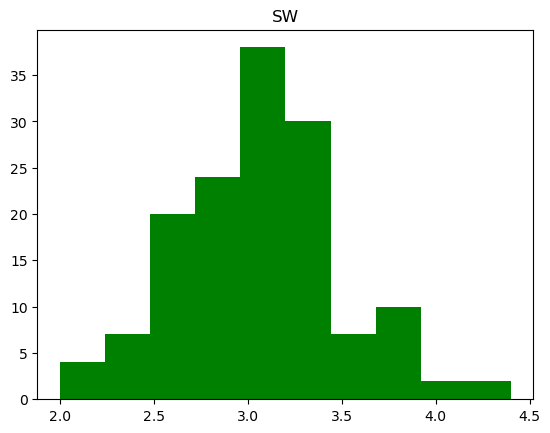

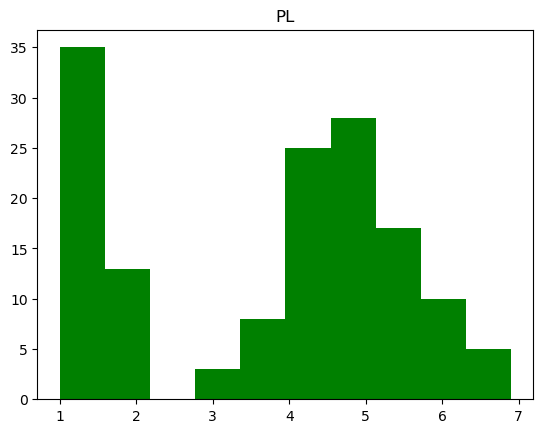

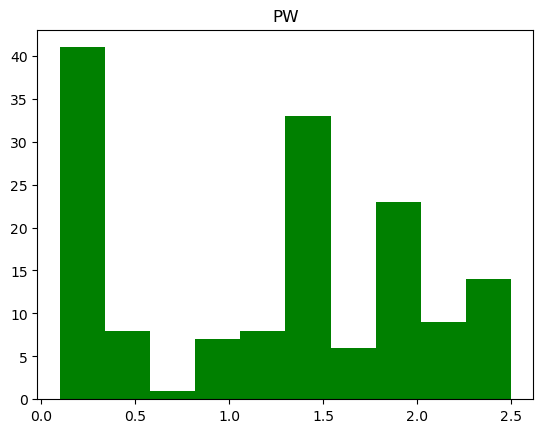

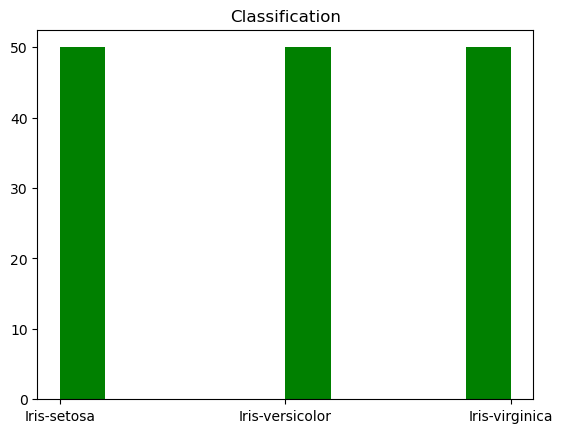

In [5]:
for i in data.columns:
    plt.hist(data[i],color='green')
    plt.title(i)
    plt.show()

In [6]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
data["Classification"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Classification, dtype: int64

In [8]:
for i in ["SL","SW","PL"]:
    data[i]=data[i].fillna(data[i].median())

In [9]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

## Feature Scaling

In [10]:
from sklearn.preprocessing import MinMaxScaler


In [11]:
num=data.drop("Classification",axis=1)
num

,SL,SW,PL,PW
0,5.1,3.5,1.40,0.2
1,4.9,3.0,1.40,0.2
2,5.8,3.2,1.30,0.2
3,4.6,3.1,1.50,0.2
4,5.0,3.6,1.40,0.2
...,...,...,...,...
145,6.7,3.0,5.20,2.3
146,6.3,2.5,5.00,1.9
147,6.5,3.0,4.35,2.0
148,6.2,3.4,5.40,2.3


In [12]:
scale=MinMaxScaler()
num=scale.fit_transform(num)
num=pd.DataFrame(num)
num.columns=["SL","SW","PL","PW"]
num  

,SL,SW,PL,PW
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.416667,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.567797,0.791667
148,0.527778,0.583333,0.745763,0.916667


In [13]:
num.describe()

,SL,SW,PL,PW
count,150.000000,150.000000,150.000000,150.000000
mean,0.431481,0.436389,0.471186,0.457778
std,0.224602,0.175831,0.293123,0.317984
min,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.531250,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


## Label Encoding

In [14]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [15]:
target=data["Classification"]
target

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Classification, Length: 150, dtype: object

In [16]:
target=le.fit_transform(target)
target=pd.DataFrame(target)
target.columns=["Classification"]
target

,Classification
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


## Train Test Split

In [17]:
x=num.copy()
y=target.copy()

In [18]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=42,test_size=0.2)

## Logistic Regression

In [19]:
#Since the Target variable has more than two label we can use
#multinomial logistic regression (softmax regression)
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(multi_class='multinomial',solver='lbfgs')
lr_model=lr.fit(xtrain,ytrain)
lr_predict=lr_model.predict(xtest)
lr_predict

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 2, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

### Metric Evaluation

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,recall_score,f1_score

In [21]:
confusion_matrix(ytest,lr_predict)

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]], dtype=int64)

In [22]:
print("Accuracy Score = ",accuracy_score(ytest,lr_predict))
print("Precision Score = ",precision_score(ytest,lr_predict,average=None))
print("Recall Score = ",recall_score(ytest,lr_predict,average=None))
print("F1 Score = ",f1_score(ytest,lr_predict,average=None))
#Since it contain more than 2 label we can't calculate Precision score, Recall Score and F1 score

Accuracy Score =  0.9666666666666667
Precision Score =  [1.         1.         0.91666667]
Recall Score =  [1.         0.88888889 1.        ]
F1 Score =  [1.         0.94117647 0.95652174]


## K- Nearest Neighbors

In [23]:
from sklearn.neighbors import KNeighborsClassifier
k_metrics=[]
neighbor=np.arange(3,20)
for k in neighbor:
    knn=KNeighborsClassifier(n_neighbors=k,metric='euclidean')
    knn_model=knn.fit(xtrain,ytrain)
    knn_predict=knn_model.predict(xtest)
    acc=accuracy_score(ytest,knn_predict)
    k_metrics.append(acc)
    
k_metrics

[0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

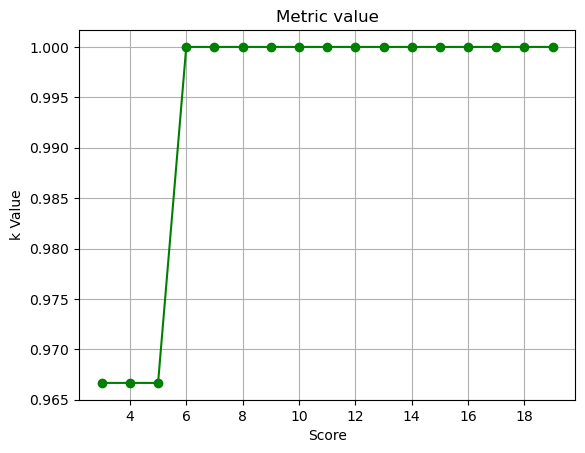

In [24]:
plt.plot(neighbor,k_metrics,marker="o",color='green')
plt.title("Metric value")
plt.xlabel("Score")
plt.ylabel("k Value")
plt.grid()

Accuracy score is greater for the value of K between 6 and 19. So,I select 7 as the value of K

In [25]:
knn=KNeighborsClassifier(n_neighbors=7,metric='euclidean')
knn_model=knn.fit(xtrain,ytrain)
knn_predict=knn_model.predict(xtest)

In [26]:
confusion_matrix(ytest,knn_predict)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [27]:
print("Accuracy Score= ",accuracy_score(ytest,knn_predict))
print("Precision Score= ",precision_score(ytest,knn_predict,average=None))
print("Recall Score= ",recall_score(ytest,knn_predict,average=None))
print("F1 Score= ",f1_score(ytest,knn_predict,average=None))

Accuracy Score=  1.0
Precision Score=  [1. 1. 1.]
Recall Score=  [1. 1. 1.]
F1 Score=  [1. 1. 1.]


## Conclusion

##### In the above dataset,there are more than two labels in target column. And also the accuracy score of KNN is greater than Logistic Regression.So I prefer KNN with K value=7 as Predictive model.